In [1]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
import statsmodels.api as sm

In [2]:
# Load the dataset into a DataFrame
# df = pd.read_csv('data/kc_house_data.csv')
df = pd.read_csv('keanan_gis_work/updated_housing.csv')

Checking info, nulls

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29211 entries, 0 to 29210
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29211 non-null  int64  
 1   date           29211 non-null  object 
 2   price          29211 non-null  float64
 3   bedrooms       29211 non-null  int64  
 4   bathrooms      29211 non-null  float64
 5   sqft_living    29211 non-null  int64  
 6   sqft_lot       29211 non-null  int64  
 7   floors         29211 non-null  float64
 8   waterfront     29211 non-null  object 
 9   greenbelt      29211 non-null  object 
 10  nuisance       29211 non-null  object 
 11  view           29211 non-null  object 
 12  condition      29211 non-null  object 
 13  grade          29211 non-null  object 
 14  heat_source    29182 non-null  object 
 15  sewer_system   29198 non-null  object 
 16  sqft_above     29211 non-null  int64  
 17  sqft_basement  29211 non-null  int64  
 18  sqft_g

- 30155 long
- lots of object types
- heat_source and sewer_system have nulls

Looking further into the null and duplicate values

In [4]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      29
sewer_system     13
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
geometry          0
MHHI1             0
traffic_de        0
toxic_rele        0
hazardou_2        0
SCHDST            0
NAME              0
DSTNUM            0
dtype: int64

In [5]:
# locating duplicates
print(f'Number of Duplicates: {df.duplicated().sum()}')
df.loc[df.duplicated() == True]

Number of Duplicates: 1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,lat,long,geometry,MHHI1,traffic_de,toxic_rele,hazardou_2,SCHDST,NAME,DSTNUM
24338,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,47.68069,-122.172135,POINT (-122.172135 47.680690000000006),95625.0,6.0,3786.715617,2.0,414,Lake Washington,17414


Function for droping duplicates, nulls, and other specified columns

In [6]:
def dropper(df, one=None, two=None, three=None):
    '''
    Input: DataFrame, request 1,request 2, request 3
    requests:
    'duplicates' to drop duplicates
    'nulls' to drop null values
    list containing df column names l = ['','','']
    '''
    request = [one,two,three]
    if 'duplicates' in request:
        df = df.drop_duplicates()
    if 'nulls' in request:
        df = df.dropna()
    for req in request:
        if isinstance(req, list):
            df = df.drop(columns=req, axis=1)
    return(df)

- below we drop duplicates and null values, in total there is only 1 duplicated row and 42 null values

In [7]:

droping =['id','geometry','address','NAME','DSTNUM']
df_clean = dropper(df, 'duplicates', 'nulls', droping)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 29210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29170 non-null  object 
 1   price          29170 non-null  float64
 2   bedrooms       29170 non-null  int64  
 3   bathrooms      29170 non-null  float64
 4   sqft_living    29170 non-null  int64  
 5   sqft_lot       29170 non-null  int64  
 6   floors         29170 non-null  float64
 7   waterfront     29170 non-null  object 
 8   greenbelt      29170 non-null  object 
 9   nuisance       29170 non-null  object 
 10  view           29170 non-null  object 
 11  condition      29170 non-null  object 
 12  grade          29170 non-null  object 
 13  heat_source    29170 non-null  object 
 14  sewer_system   29170 non-null  object 
 15  sqft_above     29170 non-null  int64  
 16  sqft_basement  29170 non-null  int64  
 17  sqft_garage    29170 non-null  int64  
 18  sqft_p

Converting time column to datetime format

In [9]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%m/%d/%Y')

Function for converting boolean catagoricals into numeric booleans 

In [10]:
def convert_boolean(df,x=None):
    '''
    This function converts all boolean data into numeric types
    Used in numeric_df
    input dataframe
    '''
    boolean_cols = df.select_dtypes(include='object').columns
    column_name = []
    for col in boolean_cols:
        if set(df[col].unique()) == {'YES', 'NO'}:
            df[col] = df[col].replace({"NO": 0, "YES": 1})
            column_name.append(col)
            return(df)
    if x != None:
        print(f'Boolean Conversions:{column_name}')
    else:
        print(display(df.head()),column_name)

In [11]:
df_clean = convert_boolean(df_clean)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 29210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29170 non-null  datetime64[ns]
 1   price          29170 non-null  float64       
 2   bedrooms       29170 non-null  int64         
 3   bathrooms      29170 non-null  float64       
 4   sqft_living    29170 non-null  int64         
 5   sqft_lot       29170 non-null  int64         
 6   floors         29170 non-null  float64       
 7   waterfront     29170 non-null  int64         
 8   greenbelt      29170 non-null  object        
 9   nuisance       29170 non-null  object        
 10  view           29170 non-null  object        
 11  condition      29170 non-null  object        
 12  grade          29170 non-null  object        
 13  heat_source    29170 non-null  object        
 14  sewer_system   29170 non-null  object        
 15  sqft_above     2917

# converting to numeric types

In [13]:
df_clean['heat_source'].value_counts()

Gas                  20147
Electricity           5950
Oil                   2899
Gas/Solar               93
Electricity/Solar       57
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [14]:
def numeric_housing(df): 
    '''
    This function converts all boolean or rating types into numerics from input df. 
    this is saved as df_numeric
    This only works with housing data
    '''

    df_numeric = df.copy()

    # Returns the new df_clean and lists the columns changed
    convert_boolean(df_numeric,1)

    # adjusting view column 
    # View has no intupretation written so it was self interpreted
    df_numeric["view"] = df_numeric["view"].replace({"NONE": 0,
                                                 "FAIR": 1,
                                                 "AVERAGE": 2,
                                                 "GOOD": 3,
                                                 "EXCELLENT": 4,})

    # adjusting condition column 
    # View https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c 
    # under building condition it lists the order
    df_numeric["condition"] = df_numeric["condition"].replace({"Poor": 0,
                                                "Fair": 1,
                                                 "Average": 2,
                                                 "Good": 3,
                                                 "Very Good": 4,})
    # adjusting grade column 
    # View https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#c 
    # under building grade it lists the order
    # they list the assosiated number with in name, i replaced it to just be the number
    df_numeric["grade"] = df_numeric["grade"].replace({"2 Substandard": 2,
                                              "3 Poor": 3,
                                              "4 Low": 4,
                                              "5 Fair": 5,
                                              "6 Low Average": 6,
                                              "7 Average": 7,
                                              "8 Good": 8,
                                              "9 Better": 9,
                                              "10 Very Good": 10,
                                              "11 Excellent": 11,
                                              "12 Luxury": 12,
                                              "13 Mansion": 13,})
   
    
    
    
    adjusted = ['view','condition', 'grade','date']
    
    print(f'Rating Conversions: {adjusted}')
#     print(display(df_numeric.head()))
    return(df_numeric)
df_clean = numeric_housing(df_clean)

Rating Conversions: ['view', 'condition', 'grade', 'date']


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 29210
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29170 non-null  datetime64[ns]
 1   price          29170 non-null  float64       
 2   bedrooms       29170 non-null  int64         
 3   bathrooms      29170 non-null  float64       
 4   sqft_living    29170 non-null  int64         
 5   sqft_lot       29170 non-null  int64         
 6   floors         29170 non-null  float64       
 7   waterfront     29170 non-null  int64         
 8   greenbelt      29170 non-null  int64         
 9   nuisance       29170 non-null  object        
 10  view           29170 non-null  int64         
 11  condition      29170 non-null  int64         
 12  grade          29170 non-null  int64         
 13  heat_source    29170 non-null  object        
 14  sewer_system   29170 non-null  object        
 15  sqft_above     2917

# Creating Dummy variables

In [16]:
def for_dummies(df,column):
    '''
    Function takes a dataframe and a column or a list or columns
    creates a dummy variable for each specified columns
    '''
#     if isinstance(column,list):
#         for n in column:
    pd.get_dummies(df, columns=column, drop_first=False)
    
    X_iterated.drop("cut_Fair", axis=1, inplace=True)
    

# Modeling

In [38]:
def correlation(df,column,rank=None):
    '''
    performs correlation matrix, drops no numeric object types
    variables are dataframe, column, and ranking
    ranking is optional
    column = 'column'
    rank = True or leave blank
    '''
    # data cleaning that needs to be moved
    # Select columns of object type and drop them
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types\n{df_object.columns}')
    df = df.drop(df_object,axis=1) 
    

#     df1 = df.drop(columns=['lat','long','yr_renovated'],axis=1)
    df1 = df
#     return df1
#     return df1['price']
    #end of data cleaning
    
    if rank is True:
        try:
            df_corr = df1.corr()[column]#.rank(ascending=False).sort_values()    # numeric_only=False
            df_corr = df_corr.drop(column)
#             print(f'{column} has been removed from the ranking')
            print(f'Ranked correlation to {column}')
            return(df_corr.rank(ascending=False).sort_values())
        except Exception as e:
            print(f"Not a valid column name\n{e}")
    else:    
        try:
            df_corr = df.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Correlation to {column}')
            return(df_corr.sort_values(ascending=False))
        except Exception as e:
            print(f"Not a valid column name\n{e}")
        

In [39]:
correlation(df_clean,'price')

The following columns were dropped due to being object types
Index(['nuisance', 'heat_source', 'sewer_system'], dtype='object')
Correlation to price


sqft_living      0.616625
grade            0.577978
sqft_above       0.546001
bathrooms        0.487829
MHHI1            0.480884
view             0.321322
sqft_patio       0.317543
lat              0.297687
bedrooms         0.290908
sqft_garage      0.267487
sqft_basement    0.246097
waterfront       0.239104
floors           0.199833
yr_built         0.106166
sqft_lot         0.086743
yr_renovated     0.085605
long             0.081813
greenbelt        0.068418
SCHDST           0.053100
condition       -0.012618
traffic_de      -0.059191
toxic_rele      -0.121423
hazardou_2      -0.308898
Name: price, dtype: float64

In [20]:
df_clean.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long',
       'MHHI1', 'traffic_de', 'toxic_rele', 'hazardou_2', 'SCHDST'],
      dtype='object')

# Creating Regression Models

In [67]:
def mlr(df,column,simple=False,model_t=None):
    '''
    This runs a Multiple Linear Regression for a set list from df_numeric.
    Call an int to return the list of columns used, mlr(1)
    dataframe,y column, optional single regression add column
    simple: 
    True = simple
    False = multiple
    model_t:
    'x' = return x columns used
    'fit' = no summary
    '''
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types\n{df_object.columns}')
    df = df.drop(df_object,axis=1) 

    df1 = df.drop(columns=['lat','long','date','sqft_above','sqft_lot','sqft_basement','sqft_patio','yr_renovated'],axis=1)
#     df1 = df[['price', 'traffic_de', 'SCHDST']]
#     df1 = df[['floors','price']]
    
    if simple == True:
        highest_corr = correlation(df, column).abs().idxmax()
        x = df[highest_corr]
    elif simple == False:
        x = df1.drop(column, axis=1)
        
    # Define the y variables
    y = df1[column]
    # create model
    model = sm.OLS(y,sm.add_constant(x)).fit()

    if model_t == 'x':
        return(sm.add_constant(x))
    elif model_t == 'fit':
        return(model)
    
    # Model Summary
    return(model.summary())


## Simple Model

In [51]:
mlr(df_clean,'price',True)

The following columns were dropped due to being object types
Index(['nuisance', 'heat_source', 'sewer_system'], dtype='object')
The following columns were dropped due to being object types
Index([], dtype='object')
Correlation to price


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.789e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:24:54   Log-Likelihood:            -4.3419e+05
No. Observations:               29170   AIC:                         8.684e+05
Df Residuals:                   29168   BIC:                         8.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.221e+04   9908.686     -9.306      0.000   -1.12e+05   -7.28e+04
sqft_living   565.3827      4.227    133.770      0.000     557.099     573.667
==============================================================================
Omnibus:                    42232.632   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50100657.663
Skew:                           8.242   Prob(JB):                         0.00
Kurtosis:                     205.359   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
mlr(df_clean,'price')

The following columns were dropped due to being object types
Index(['nuisance', 'heat_source', 'sewer_system'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     2256.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:25:20   Log-Likelihood:            -4.2942e+05
No. Observations:               29170   AIC:                         8.589e+05
Df Residuals:                   29153   BIC:                         8.590e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.653e+06   3.24e+05     17.444      0.000    5.02e+06    6.29e+06
bedrooms    -7.724e+04   4915.968    -15.713      0.000   -8.69e+04   -6.76e+04
bathrooms    8.412e+04   7010.999     11.998      0.000    7.04e+04    9.79e+04
sqft_living   349.7299      7.557     46.281      0.000     334.919     364.541
floors      -7.268e+04   8499.790     -8.551      0.000   -8.93e+04    -5.6e+04
waterfront   1.016e+06   2.99e+04     33.966      0.000    9.57e+05    1.07e+06
greenbelt   -4.825e+04   2.23e+04     -2.164      0.030    -9.2e+04   -4542.976
view         7.819e+04   4766.789     16.404      0.000    6.89e+04    8.75e+04
condition    1.672e+04   5332.728      3.135      0.002    6263.619    2.72e+04
grade        1.938e+05   5400.664     35.888      0.000    1.83e+05    2.04e+05
sqft_garage  -117.2233     16.960     -6.912      0.000    -150.465     -83.981
yr_built    -3556.0766    169.215    -21.015      0.000   -3887.746   -3224.408
MHHI1           6.0698      0.147     41.399      0.000       5.782       6.357
traffic_de   1.507e+04   1412.803     10.664      0.000    1.23e+04    1.78e+04
toxic_rele      1.0178      0.146      6.987      0.000       0.732       1.303
hazardou_2  -3.923e+04   1408.825    -27.845      0.000    -4.2e+04   -3.65e+04
SCHDST       -131.2416     24.734     -5.306      0.000    -179.721     -82.763
==============================================================================
Omnibus:                    45443.524   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         85375286.704
Skew:                           9.442   Prob(JB):                         0.00
Kurtosis:                     267.361   Cond. No.                     8.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a significantly high multicollinearity between variables

# Checking Assumptions

Defining x, y, and the model variables

In [75]:
# model
model_mlr = mlr(df_clean,'price',False, 'fit')
# X constant
X = mlr(df_clean,'price',False,'x')
# y 
Y = df_clean['price']

The following columns were dropped due to being object types
Index(['nuisance', 'heat_source', 'sewer_system'], dtype='object')
The following columns were dropped due to being object types
Index(['nuisance', 'heat_source', 'sewer_system'], dtype='object')


## 1. Linearity

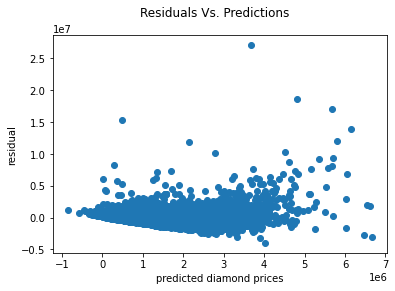

In [95]:
model_L = model_mlr.predict(X)
resid = Y - model_L

fig, ax = plt.subplots()

ax.scatter(model_L, resid)

ax.set_xlabel('predicted diamond prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

## 2. Durbin-Watson

In [78]:
dw = sm.stats.stattools.durbin_watson
dw(resid)

1.4493312146363662

In [83]:
model_mlr.summary().tables[2]

Omnibus:,45443.524,Durbin-Watson:,1.449
Prob(Omnibus):,0.000,Jarque-Bera (JB):,85375286.704
Skew:,9.442,Prob(JB):,0.00
Kurtosis:,267.361,Cond. No.,8.89e+06


## 3. Normality

In [25]:
X = ['floors','MHHI1', 'traffic_de', 'toxic_rele', 'hazardou_2', 'SCHDST']
y1 = df_clean['price']

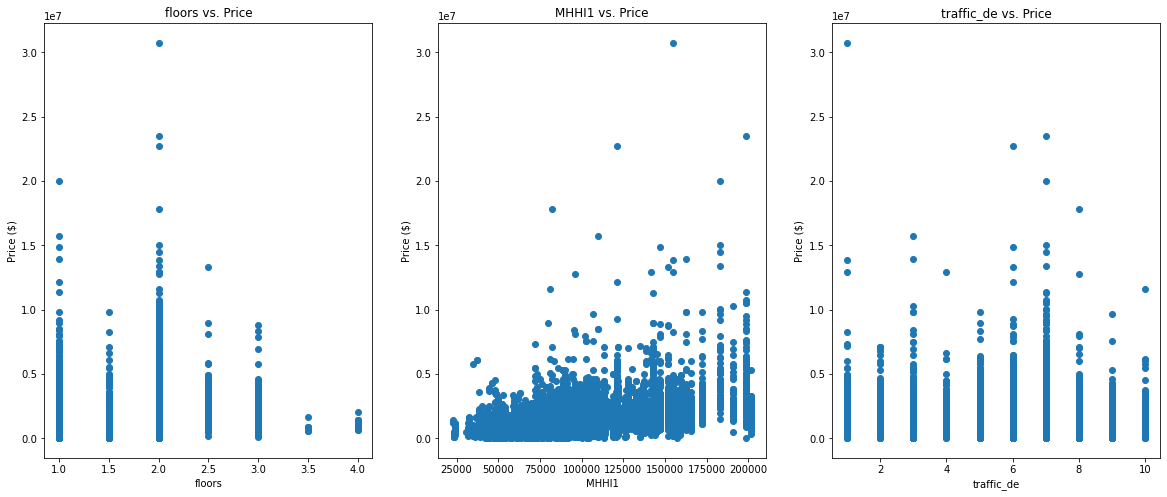

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].scatter(df_clean[X[0]], y1)
axs[0].set_xlabel(f'{X[0]}')
axs[0].set_ylabel('Price ($)')
axs[0].set_title(f'{X[0]} vs. Price')

axs[1].scatter(df_clean[X[1]], y1)
axs[1].set_xlabel(f'{X[1]}')
axs[1].set_ylabel('Price ($)')
axs[1].set_title(f'{X[1]} vs. Price')

axs[2].scatter(df_clean[X[2]], y1)
axs[2].set_xlabel(f'{X[2]}')
axs[2].set_ylabel('Price ($)')
axs[2].set_title(f'{X[2]} vs. Price')

plt.show()

In [31]:
# fig, ax = plt.subplots()
# ax.scatter(X,y); 

# ax.set_xlabel('Square Foot Living (ft)')
# ax.set_ylabel('Price ($)')
# ax.set_title('Price of Houses based on Square foot')

# plt.show()

In [ ]:
# sns.lmplot(data=df_cleaned_2, x='sqft_living', y='price')
# plt.xlabel('Sqft Living (sqft)')
# plt.ylabel('Price ($)')
# plt.title('Price against to Sqft Living');